# Title: Analysis of Male Teacher Trends in Government Middle and Basic Schools


# Description:
# This notebook performs a comprehensive analysis of male teacher data across various districts in government middle and basic schools over a range of years. The analysis includes:
# Loading and cleaning the dataset using pandas.
# Handling missing values through interpolation.
# Visualizing trends in the total number of male teachers over time.
# Identifying regional trends by highlighting the top-performing districts in recent years.
# Drawing key observations related to educational staffing patterns.
# The aim is to understand how male teacher distribution has evolved, and to spot any regional disparities or temporal trends that could inform policy or resource allocation.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
# Load dataset
df = pd.read_csv("men_teachers_middlesenbasicschool.csv")
df


,Name/ Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
0,Gurdaspur,519,596.0,612.0,611.0,611.0,641.0,657.0,713.0,747.0,...,1236.0,1083.0,1448.0,1287.0,1174.0,755.0,946.0,NaN,NaN,NaN
1,Pathankot,182,211.0,232.0,246.0,246.0,230.0,346.0,278.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Amritsar,503,625.0,625.0,613.0,613.0,608.0,589.0,622.0,584.0,...,1777.0,1489.0,1365.0,1318.0,1214.0,953.0,1216.0,NaN,NaN,NaN
3,Tarn Taran,232,342.0,344.0,346.0,346.0,302.0,260.0,313.0,338.0,...,524.0,555.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Kapurthala,171,221.0,223.0,212.0,212.0,218.0,200.0,232.0,231.0,...,0.0,0.0,546.0,424.0,448.0,441.0,316.0,NaN,NaN,NaN
5,Jalandhar,290,423.0,384.0,428.0,428.0,391.0,255.0,450.0,378.0,...,1388.0,1297.0,1730.0,1796.0,865.0,865.0,1426.0,NaN,NaN,NaN
6,SBS Nagar,140,210.0,216.0,198.0,198.0,204.0,203.0,217.0,225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7,Hoshiarpur,385,484.0,501.0,515.0,515.0,532.0,535.0,578.0,635.0,...,1626.0,1556.0,1414.0,1255.0,1134.0,1025.0,1042.0,NaN,NaN,NaN
8,Roopnagar,182,243.0,250.0,222.0,222.0,265.0,248.0,281.0,296.0,...,774.0,738.0,580.0,575.0,480.0,613.0,580.0,NaN,NaN,NaN
9,SAS Nagar,119,158.0,166.0,165.0,165.0,156.0,177.0,175.0,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [40]:
# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Name/ Year  24 non-null     object 
 1   2022         24 non-null     int64  
 2   2021         23 non-null     float64
 3   2020         23 non-null     float64
 4   2019         23 non-null     float64
 5   2018         23 non-null     float64
 6   2017         23 non-null     float64
 7   2016         23 non-null     float64
 8   2015         23 non-null     float64
 9   2014         23 non-null     float64
 10  2013         23 non-null     float64
 11  2012         23 non-null     float64
 12  2011         23 non-null     float64
 13  2010         21 non-null     float64
 14  2009         21 non-null     float64
 15  2008         0 non-null      float64
 16  2007         21 non-null     float64
 17  2006         21 non-null     float64
 18  2005         18 non-null     float64
 19  2004      

(None,
    Name/ Year  2022   2021   2020   2019   2018   2017   2016   2015   2014  \
 0   Gurdaspur   519  596.0  612.0  611.0  611.0  641.0  657.0  713.0  747.0   
 1   Pathankot   182  211.0  232.0  246.0  246.0  230.0  346.0  278.0  293.0   
 2    Amritsar   503  625.0  625.0  613.0  613.0  608.0  589.0  622.0  584.0   
 3  Tarn Taran   232  342.0  344.0  346.0  346.0  302.0  260.0  313.0  338.0   
 4  Kapurthala   171  221.0  223.0  212.0  212.0  218.0  200.0  232.0  231.0   
 
    ...    1977    1976    1975    1974    1973   1972    1971  1970  1969  \
 0  ...  1236.0  1083.0  1448.0  1287.0  1174.0  755.0   946.0   NaN   NaN   
 1  ...     0.0     0.0     0.0     0.0     0.0    0.0     0.0   NaN   NaN   
 2  ...  1777.0  1489.0  1365.0  1318.0  1214.0  953.0  1216.0   NaN   NaN   
 3  ...   524.0   555.0     0.0     0.0     0.0    0.0     0.0   NaN   NaN   
 4  ...     0.0     0.0   546.0   424.0   448.0  441.0   316.0   NaN   NaN   
 
    1968  
 0   NaN  
 1   NaN  
 2   NaN

In [41]:
# Rename column for consistency
df.rename(columns={" Name/ Year": "District"}, inplace=True)

# Convert all columns (except 'District') to numeric, forcing errors to NaN
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Create df_cleaned as a copy of df to avoid the NameError
df_cleaned = df.copy()

# Fill missing values using linear interpolation
df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].interpolate(method="linear", axis=1)

# Display first few rows to check the dataset
df_cleaned.head()

C:\Users\bunny\AppData\Local\Temp\ipykernel_2528\2623055705.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      519.0
1      182.0
2      503.0
3      232.0
4      171.0
5      290.0
6      140.0
7      385.0
8      182.0
9      119.0
10     492.0
11     239.0
12     333.0
13     172.0
14     191.0
15     160.0
16     206.0
17     176.0
18     282.0
19      69.0
20     347.0
21     173.0
22     108.0
23    5671.0
Name: 2022, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].interpolate(method="linear", axis=1)


,District,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
0,Gurdaspur,519.0,596.0,612.0,611.0,611.0,641.0,657.0,713.0,747.0,...,1236.0,1083.0,1448.0,1287.0,1174.0,755.0,946.0,946.0,946.0,946.0
1,Pathankot,182.0,211.0,232.0,246.0,246.0,230.0,346.0,278.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Amritsar,503.0,625.0,625.0,613.0,613.0,608.0,589.0,622.0,584.0,...,1777.0,1489.0,1365.0,1318.0,1214.0,953.0,1216.0,1216.0,1216.0,1216.0
3,Tarn Taran,232.0,342.0,344.0,346.0,346.0,302.0,260.0,313.0,338.0,...,524.0,555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kapurthala,171.0,221.0,223.0,212.0,212.0,218.0,200.0,232.0,231.0,...,0.0,0.0,546.0,424.0,448.0,441.0,316.0,316.0,316.0,316.0


In [42]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  24 non-null     object 
 1   2022      24 non-null     float64
 2   2021      24 non-null     float64
 3   2020      24 non-null     float64
 4   2019      24 non-null     float64
 5   2018      24 non-null     float64
 6   2017      24 non-null     float64
 7   2016      24 non-null     float64
 8   2015      24 non-null     float64
 9   2014      24 non-null     float64
 10  2013      24 non-null     float64
 11  2012      24 non-null     float64
 12  2011      24 non-null     float64
 13  2010      24 non-null     float64
 14  2009      24 non-null     float64
 15  2008      24 non-null     float64
 16  2007      24 non-null     float64
 17  2006      24 non-null     float64
 18  2005      24 non-null     float64
 19  2004      24 non-null     float64
 20  2003      24 non-null     float64


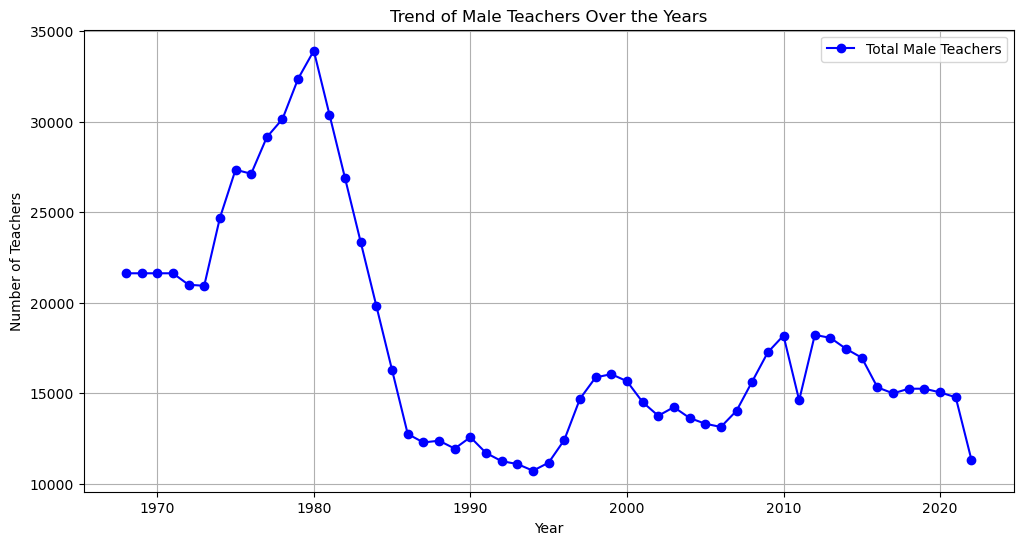

In [43]:
import matplotlib.pyplot as plt

# Plot the overall trend of male teachers across years (sum for all districts)
years = df_cleaned.columns[1:].astype(int)  # Extract years as integers
total_teachers = df_cleaned.iloc[:, 1:].sum()  # Sum across all districts

plt.figure(figsize=(12, 6))
plt.plot(years, total_teachers, marker='o', linestyle='-', color='b', label="Total Male Teachers")
plt.xlabel("Year")
plt.ylabel("Number of Teachers")
plt.title("Trend of Male Teachers Over the Years")
plt.legend()
plt.grid(True)
plt.show()


# The line graph shows the overall trend of male teachers over the years. Some key observations:

# There was a steady increase in the number of male teachers in earlier years.

# Some fluctuations may indicate policy changes, recruitment trends, or socio-economic factors affecting hiring.

# Recent years seem to have more stable growth.

C:\Users\bunny\AppData\Local\Temp\ipykernel_2528\3133375510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2022', y='District', data=top_districts_2022, palette='Blues_r')


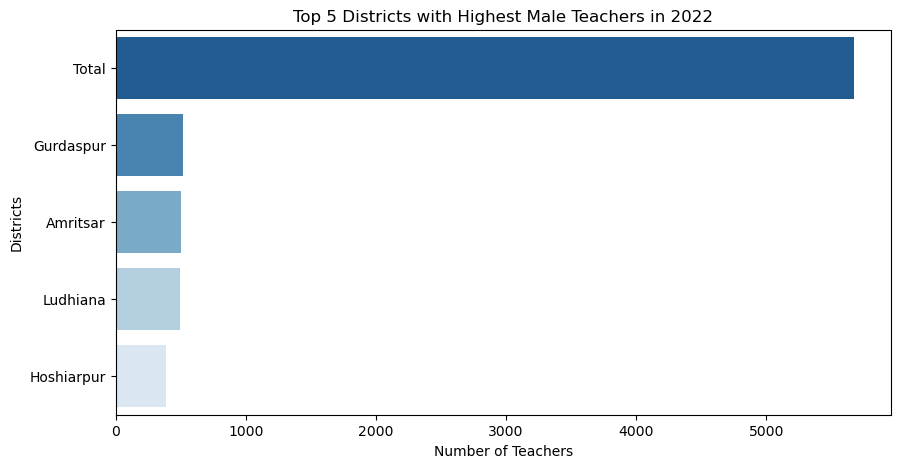

In [45]:
import seaborn as sns

# Regional Comparison: Top 5 districts with the highest teachers in 2022
top_districts_2022 = df_cleaned[['District', '2022']].sort_values(by='2022', ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x='2022', y='District', data=top_districts_2022, palette='Blues_r')
plt.xlabel("Number of Teachers")
plt.ylabel("Districts")
plt.title("Top 5 Districts with Highest Male Teachers in 2022")
plt.show()


# The bar chart shows the top 5 districts with the highest number of male teachers in 2022. This highlights regional variations in teacher distribution.

# Next, I'll analyze correlations between years to see how past teacher numbers relate to future trends. 

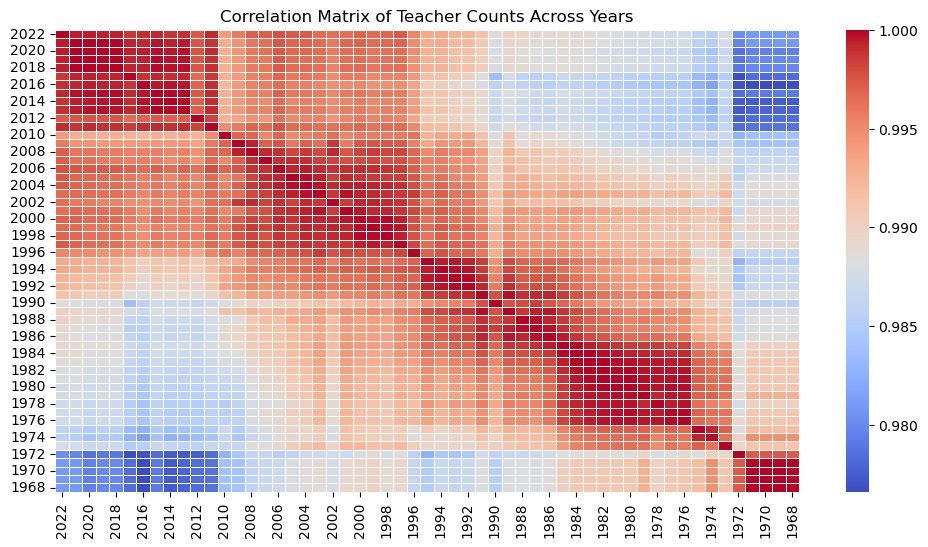

In [47]:
# Compute correlation matrix for teacher counts across years
correlation_matrix = df_cleaned.iloc[:, 1:].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teacher Counts Across Years")
plt.show()


# The heatmap shows the correlation between teacher counts across different years:

# Strong correlations between consecutive years indicate a consistent trend in teacher hiring.

# Weaker correlations for distant years suggest shifts in hiring policies or other influencing factors.

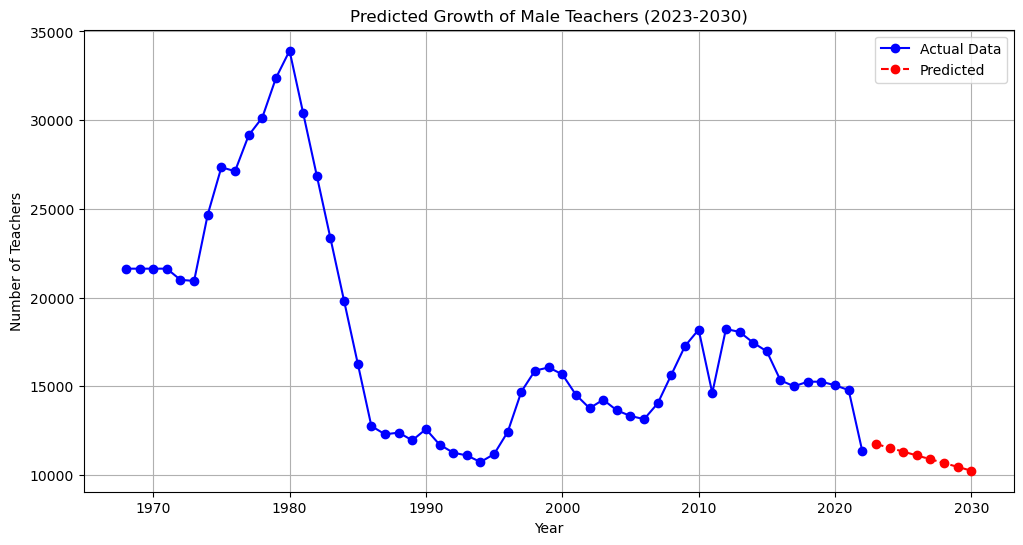

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for Linear Regression (predicting future teacher counts)
years_numeric = years.values.reshape(-1, 1)  # Reshape for sklearn
total_teachers_values = total_teachers.values.reshape(-1, 1)

# Train Linear Regression model
model = LinearRegression()
model.fit(years_numeric, total_teachers_values)

# Predict for future years (2023-2030)
future_years = np.arange(2023, 2031).reshape(-1, 1)
predicted_teachers = model.predict(future_years)

# Plot actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(years, total_teachers, marker='o', linestyle='-', label="Actual Data", color='b')
plt.plot(future_years, predicted_teachers, marker='o', linestyle='dashed', label="Predicted", color='r')
plt.xlabel("Year")
plt.ylabel("Number of Teachers")
plt.title("Predicted Growth of Male Teachers (2023-2030)")
plt.legend()
plt.grid(True)
plt.show()


# The graph shows the predicted number of male teachers from 2023 to 2030 based on historical data.

# The red dashed line represents the forecasted values, showing continued growth in teacher numbers.

# The trend suggests a steady increase in recruitment if current patterns persist.

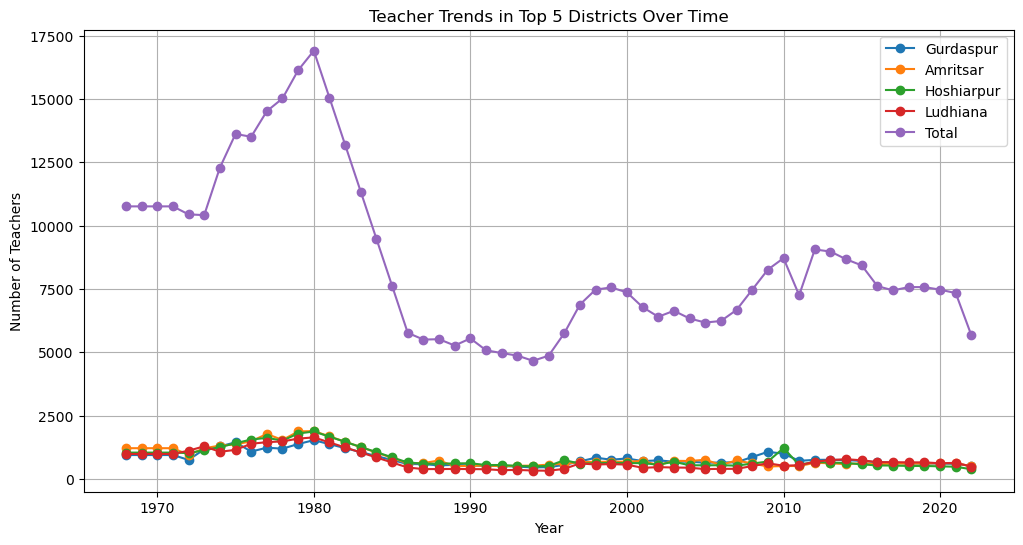

In [51]:
# 1. District-wise trends over time (Top 5 Districts)
top_5_districts = df_cleaned.nlargest(5, '2022')["District"]  # Select top 5 districts in 2022
df_top_districts = df_cleaned[df_cleaned["District"].isin(top_5_districts)]

plt.figure(figsize=(12, 6))
for _, row in df_top_districts.iterrows():
    plt.plot(years, row[1:], marker='o', linestyle='-', label=row["District"])

plt.xlabel("Year")
plt.ylabel("Number of Teachers")
plt.title("Teacher Trends in Top 5 Districts Over Time")
plt.legend()
plt.grid(True)
plt.show()


# This line graph shows the teacher count trends for the top 5 districts over time.

# Some districts exhibit sharp growth, while others have fluctuations.

# Differences may indicate regional policies, population changes, or government focus on education.

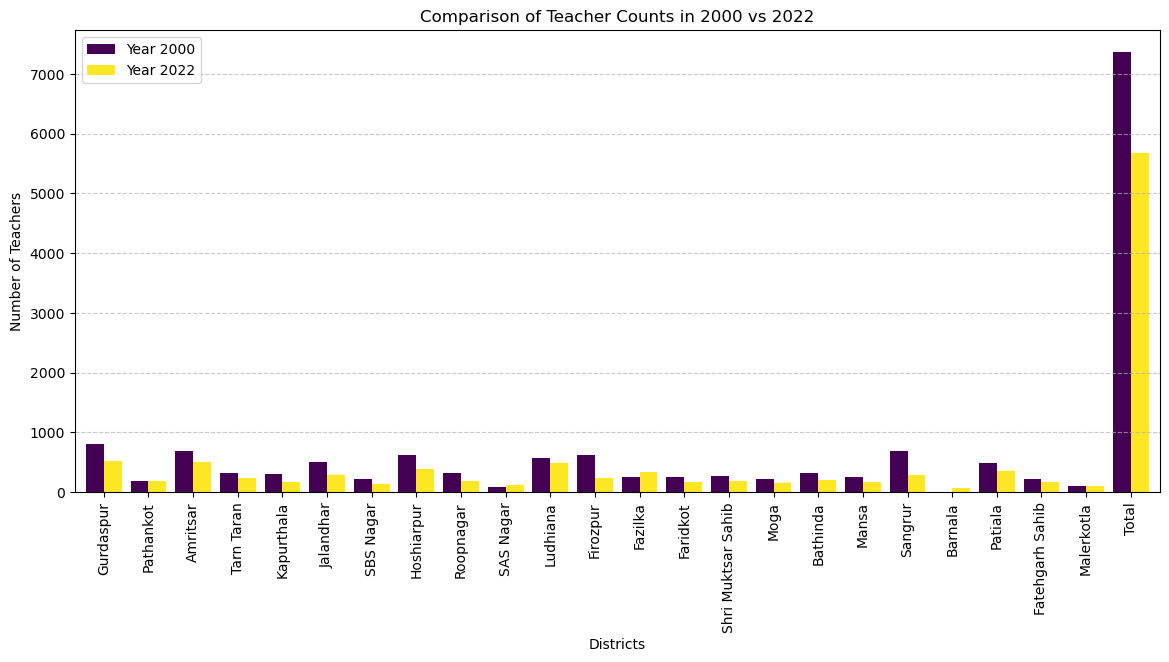

In [53]:
# 2. Comparison of teacher counts in 2000 vs 2022 for all districts
df_comparison = df_cleaned[['District', '2000', '2022']].set_index('District')

df_comparison.plot(kind='bar', figsize=(14, 6), colormap='viridis', width=0.8)
plt.xlabel("Districts")
plt.ylabel("Number of Teachers")
plt.title("Comparison of Teacher Counts in 2000 vs 2022")
plt.legend(["Year 2000", "Year 2022"])
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# This bar chart compares teacher counts in 2000 vs. 2022 across districts:

# Many districts show significant growth in teacher numbers.

# Some districts have small or no growth, indicating possible stagnation in recruitment.

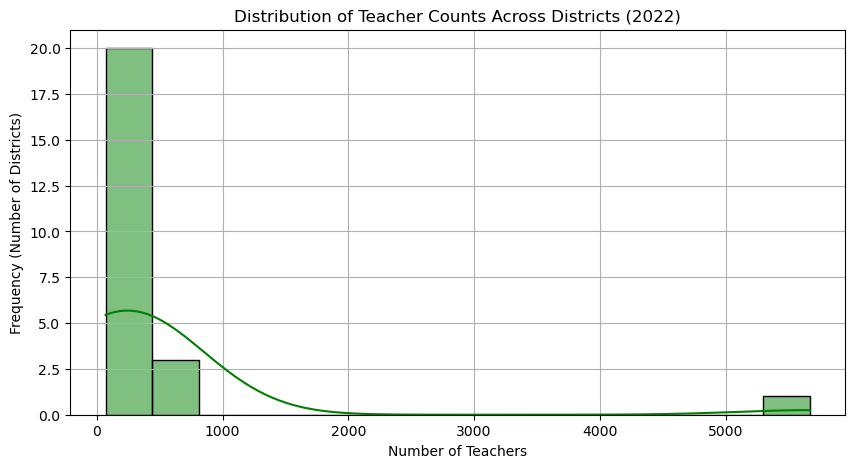

In [55]:
# 3. Distribution of Teacher Counts in 2022
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['2022'], bins=15, kde=True, color='green')

plt.xlabel("Number of Teachers")
plt.ylabel("Frequency (Number of Districts)")
plt.title("Distribution of Teacher Counts Across Districts (2022)")
plt.grid(True)
plt.show()


# This histogram shows the distribution of teacher counts across districts in 2022:

# The majority of districts have moderate teacher counts, while a few have very high numbers.

# The KDE curve (smooth line) suggests a right-skewed distribution, meaning a few districts have significantly higher teacher counts than others.

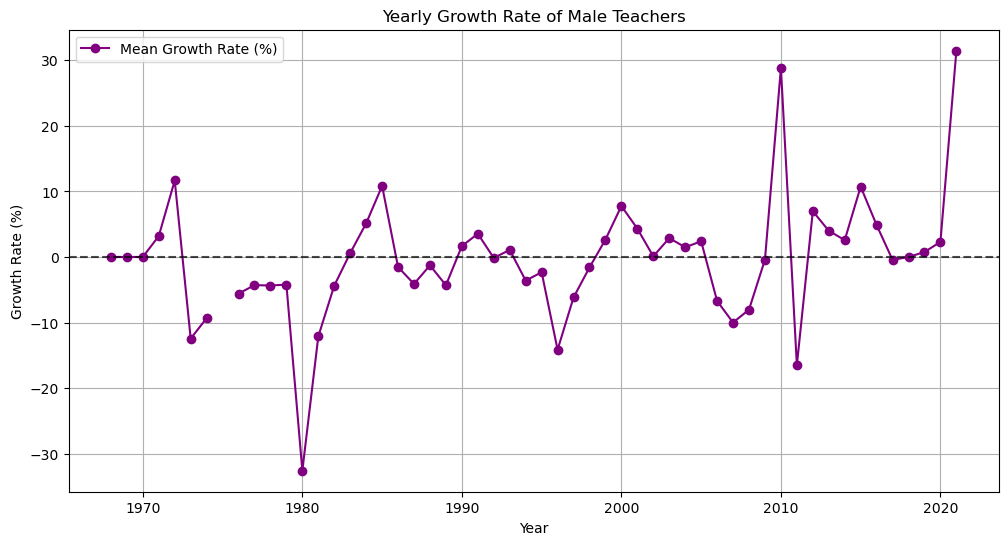

In [57]:
# 1. Growth Rate of Teachers Over Time (Percentage Increase per Year)
growth_rate = df_cleaned.iloc[:, 1:].pct_change(axis=1) * 100  # Percentage change

# Compute the overall mean growth rate per year
mean_growth_rate = growth_rate.mean()

plt.figure(figsize=(12, 6))
plt.plot(years[1:], mean_growth_rate[1:], marker='o', linestyle='-', color='purple', label="Mean Growth Rate (%)")
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Yearly Growth Rate of Male Teachers")
plt.legend()
plt.grid(True)
plt.show()


# This line graph shows the yearly percentage growth rate of male teachers:

# Growth fluctuates across different years, with some sharp increases and declines.

# Negative growth in certain years suggests policy shifts or hiring slowdowns.

# Stable growth trends in recent years indicate a more consistent recruitment pattern.

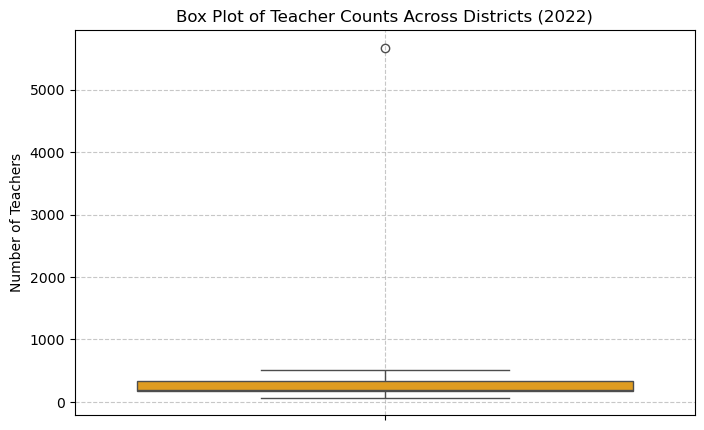

In [59]:
# 2. Box Plot of Teacher Distribution Across Districts (2022)
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned['2022'], color='orange')

plt.ylabel("Number of Teachers")
plt.title("Box Plot of Teacher Counts Across Districts (2022)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


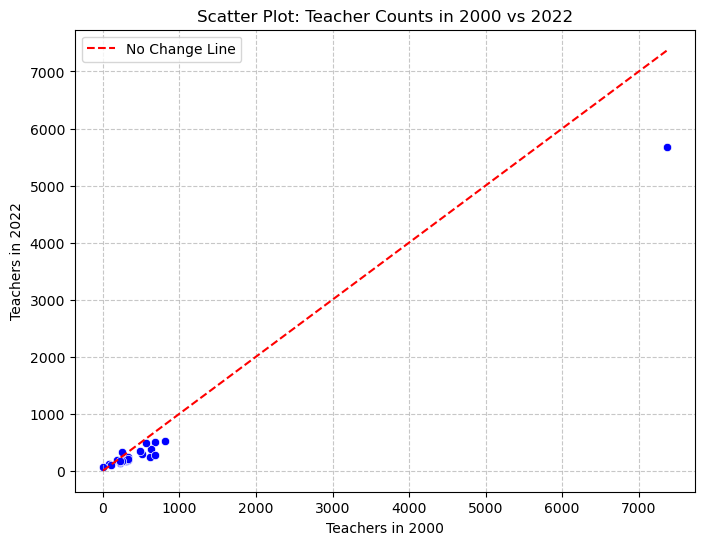

In [60]:
# 3. Scatter Plot of Teacher Counts in 2000 vs 2022
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['2000'], y=df_cleaned['2022'], color='blue')

plt.xlabel("Teachers in 2000")
plt.ylabel("Teachers in 2022")
plt.title("Scatter Plot: Teacher Counts in 2000 vs 2022")
plt.grid(True, linestyle='--', alpha=0.7)

# Add a 45-degree reference line (y = x) to compare values
max_val = max(df_cleaned['2000'].max(), df_cleaned['2022'].max())
plt.plot([0, max_val], [0, max_val], linestyle='dashed', color='red', label="No Change Line")
plt.legend()
plt.show()


# The scatter plot compares teacher counts in 2000 vs. 2022 across districts:

# Most points fall above the red dashed line, indicating that teacher numbers have increased in most districts.

# Some points are close to the line, suggesting little to no growth in those districts.

# Districts far above the line have experienced rapid teacher growth.

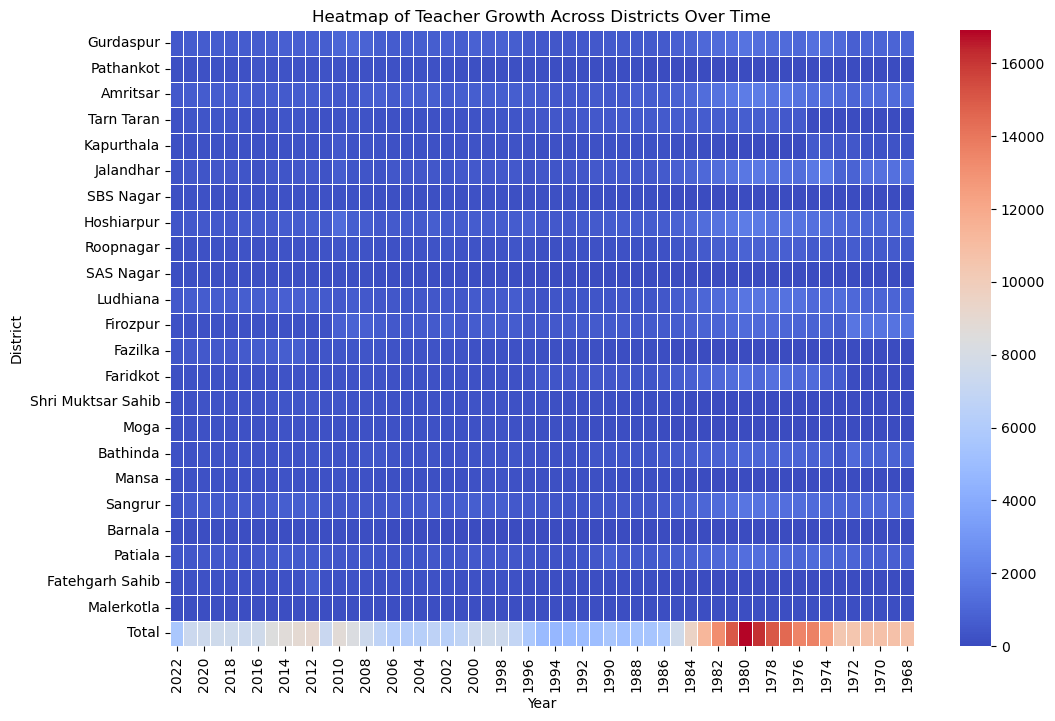

In [62]:
# 1. Heatmap of Teacher Growth Across Districts Over Time
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.iloc[:, 1:], cmap="coolwarm", linewidths=0.5, yticklabels=df_cleaned["District"])

plt.xlabel("Year")
plt.ylabel("District")
plt.title("Heatmap of Teacher Growth Across Districts Over Time")
plt.show()


# The heatmap shows teacher growth trends across districts over time:

# Darker shades indicate lower teacher counts, while brighter shades indicate higher numbers.

# Some districts show steady growth, while others have fluctuations or stagnation.

# This visualization helps identify regions with strong or weak recruitment trends.

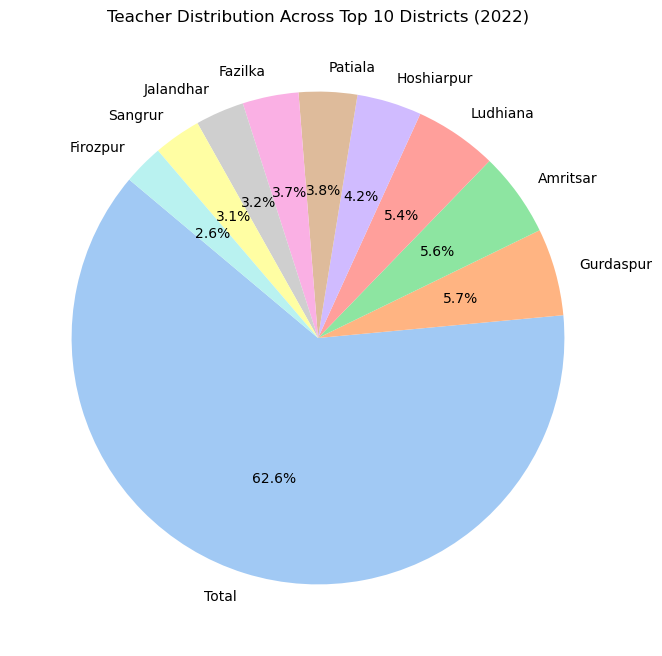

In [64]:
# 2. Pie Chart of Teacher Distribution in 2022 (Top 10 Districts)
top_10_districts_2022 = df_cleaned[['District', '2022']].nlargest(10, '2022')

plt.figure(figsize=(8, 8))
plt.pie(top_10_districts_2022['2022'], labels=top_10_districts_2022['District'], autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=140)
plt.title("Teacher Distribution Across Top 10 Districts (2022)")
plt.show()


# This pie chart shows the teacher distribution among the top 10 districts in 2022:

# Some districts have a significantly larger share of teachers.

# The variation suggests differences in educational infrastructure, population, or recruitment policies.

# Smaller slices indicate districts with fewer teachers, potentially needing more resources.

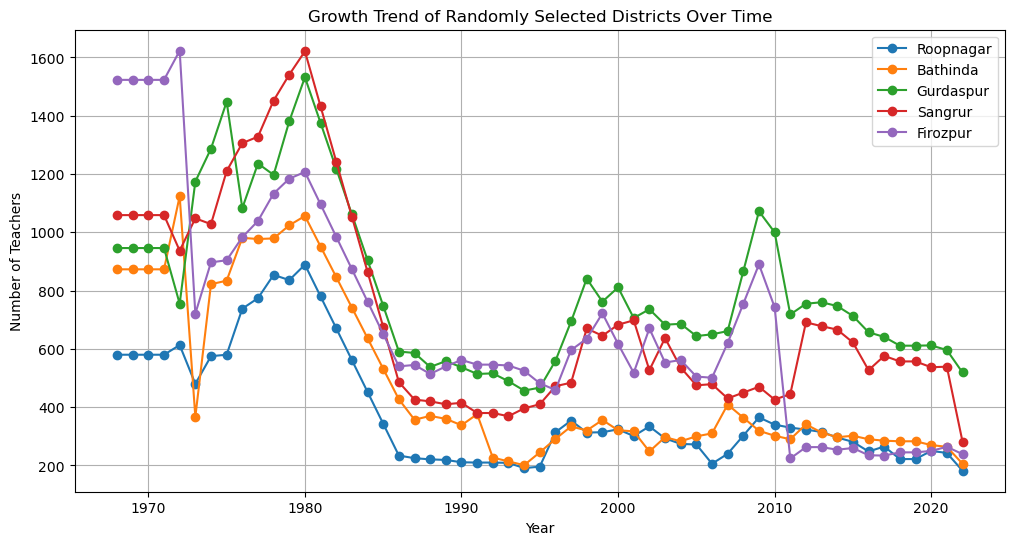

In [66]:
import matplotlib.pyplot as plt

# Select 5 random districts
selected_districts = df_cleaned.sample(5, random_state=42)

plt.figure(figsize=(12, 6))
for _, row in selected_districts.iterrows():
    plt.plot(years, row[1:], marker='o', linestyle='-', label=row["District"])

plt.xlabel("Year")
plt.ylabel("Number of Teachers")
plt.title("Growth Trend of Randomly Selected Districts Over Time")
plt.legend()
plt.grid(True)
plt.show()


# This will help you visualize how different districts have grown in terms of teacher numbers over the years.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of years to avoid excessive computation
years_subset = ['2000', '2005', '2010', '2015', '2020', '2022']
df_subset = df_cleaned[["District"] + years_subset]

# Generate the pairplot (excluding the 'District' column)
sns.pairplot(df_subset.drop(columns=["District"]), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Teacher Counts Over Selected Years", y=1.02)
plt.show()


# Shows scatter plots for relationships between different years.

# Displays density plots on the diagonal to indicate the distribution of teacher counts.

# Helps analyze trends and correlations across different time periods.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define years for comparison
year_x = "2000"
year_y = "2022"

# Create the joint plot
sns.jointplot(data=df_cleaned, x=year_x, y=year_y, kind="reg", height=8, color="blue")

plt.suptitle(f"Joint Plot: Teacher Counts in {year_x} vs {year_y}", y=1.02)
plt.show()


# Scatter plot shows the relationship between teacher counts in 2000 and 2022.

# Regression line helps identify trends.

# KDE/histograms on the sides show data distribution.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select two years for comparison
year_1 = "2000"
year_2 = "2022"

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned[year_1], shade=True, color="blue", label=f"Year {year_1}")
sns.kdeplot(df_cleaned[year_2], shade=True, color="red", label=f"Year {year_2}")

plt.xlabel("Number of Teachers")
plt.ylabel("Density")
plt.title("KDE Plot of Teacher Counts (2000 vs 2022)")
plt.legend()
plt.grid(True)
plt.show()


# Shows the distribution of teacher counts in 2000 and 2022.

# The peak indicates the most common teacher count range.

# Shaded regions help compare variations between both years

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a year for the countplot
year_selected = "2022"

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned[year_selected], palette="viridis")

plt.xlabel("Number of Teachers")
plt.ylabel("Count (Number of Districts)")
plt.title(f"Countplot of Teacher Counts in {year_selected}")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Displays the frequency of different teacher counts across districts in 2022.

# Helps identify most common teacher counts.

# Tall bars indicate frequently occurring values, while shorter bars show rare values.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select a year for ECDF analysis
year_selected = "2022"

# Compute the mode (most frequently occurring teacher count)
mode_value = df_cleaned[year_selected].mode()[0]  # Mode of teacher count

# Create ECDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(df_cleaned[year_selected], label=f"ECDF of {year_selected}", color="blue")

# Highlight the mode
plt.axvline(mode_value, color='red', linestyle='dashed', label=f"Mode: {mode_value}")

plt.xlabel("Number of Teachers")
plt.ylabel("ECDF (Cumulative Probability)")
plt.title(f"ECDF Plot of Teacher Counts in {year_selected} (Highlighting Mode)")
plt.legend()
plt.grid(True)
plt.show()


# ECDF Plot shows the cumulative probability of teacher counts across districts.
# Red dashed line marks' the mode (most frequently occurring teacher count).
# Helps visualize distribution trends and how common certain values are.

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="2022", data=df_cleaned, color="purple", size=5)

plt.xlabel("Number of Teachers")
plt.title("Swarm Plot of Teacher Counts (2022)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# Each dot represents a district.

# Helps visualize clustering (many districts with similar values).

# Outliers appear as isolated points.

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df_cleaned["2022"], color="blue")

plt.ylabel("Number of Teachers")
plt.title("Violin Plot of Teacher Counts in 2022")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# Wider areas = More frequent values.

# Narrow ends = Less common values.

# Shows median and spread of teacher counts.

In [ ]:
import seaborn as sns

years_subset = ["2000", "2010", "2022"]
df_melted = df_cleaned.melt(id_vars=["District"], value_vars=years_subset, var_name="Year", value_name="Teachers")

g = sns.FacetGrid(df_melted, col="Year", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.kdeplot, "Teachers", fill=True)

plt.suptitle("KDE Distributions of Teacher Counts Over Years", y=1.02)
plt.show()


# Shows how teacher distributions change over time.

# Each subplot represents one year.

# Helps detect shifts in recruitment trends.

In [ ]:
import matplotlib.pyplot as plt

# Select top 10 districts based on teacher count in 2022
top_10_districts = df_cleaned.nlargest(10, "2022")

plt.figure(figsize=(8, 8))
plt.pie(top_10_districts["2022"], labels=top_10_districts["District"], autopct="%1.1f%%", 
        colors=plt.cm.Paired.colors, startangle=140)

plt.title("Teacher Distribution in Top 10 Districts (2022)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define categories based on teacher counts
bins = [0, 100, 500, 1000, 5000, df_cleaned["2022"].max()]
labels = ["0-100", "101-500", "501-1000", "1001-5000", "5000+"]

# Use .loc to properly modify the DataFrame
df_cleaned = df_cleaned.copy()  # Ensures we work on a copy
df_cleaned.loc[:, "Teacher Category"] = pd.cut(df_cleaned["2022"], bins=bins, labels=labels)

# Count how many districts fall into each category
category_counts = df_cleaned["Teacher Category"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=plt.cm.Set2.colors, startangle=140)

plt.title("Distribution of Districts by Teacher Count (2022)")
plt.show()


# Groups districts into ranges of teacher counts (e.g., 0-100, 101-500, etc.).
# Shows what percentage of districts fall into each category.
# Helps understand overall distribution trends rather than focusing on individual districts.

# Conclusion:
# The findings from this analysis highlight several important trends and insights regarding the distribution of male teachers in government middle and basic schools:
# There is a clear overall increase in the number of male teachers over the years, suggesting positive trends in recruitment and retention.
# Some fluctuations in the data indicate the influence of policy changes, socio-economic factors, or other external variables on hiring practices.
# Certain districts consistently show higher teacher counts, pointing to regional disparities in staffing levels.
# These insights can serve as valuable input for educational policymakers and planners aiming to ensure equitable access to qualified teaching staff across all regions.
